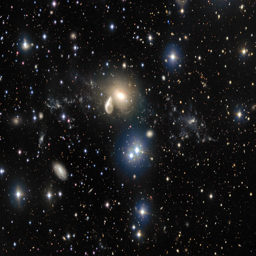

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from IPython.display import display, clear_output
from io import BytesIO
from PIL import Image as PILImage
import requests

SAVE_DIR = 'eso_images'
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

BASE_URL = 'https://www.eso.org'
DOWNLOAD_BASE_URL = 'https://cdn.eso.org/images/screen/'
pages = 10

for page in range(1, pages + 1):
    url = f'{BASE_URL}/public/images/list/{page}/'
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    divs = soup.find_all('div', class_='col-md-12')
    script = ""
    for div in divs:
        if div.find('script'):
            script = div.find('script')
    if script:
        script_content = script.string
        if script_content:
            lines = script_content.split('\n')
            for line in lines:
                if 'id:' in line:
                    start = line.find("'") + 1
                    end = line.find("'", start)
                    id_name = line[start:end]
                    image_url = f'{DOWNLOAD_BASE_URL}{id_name}.jpg'
                    resp = requests.get(image_url)
                    img = PILImage.open(BytesIO(resp.content))
                    img_resized = img.resize((256, 256))
                    display(img_resized)

                    decision = input(f"¿Guardar imagen '{id_name}'? (y/n): ").strip().lower()
                    if decision == 'y':
                        save_path = os.path.join(SAVE_DIR, f'{id_name}.jpg')
                        img.save(save_path)
                        print(f"Imagen guardada en: {save_path}")
                    else:
                        print("Imagen descartada.")
                    clear_output(wait=True)
                    